<a href="https://colab.research.google.com/github/sznajder/Notebooks/blob/master/GraphPINN_Perdikaris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USNCCM15 Short Course

# SC15-009: Recent Advances in Physics-Informed Deep Learning

# Hands-on tutorial on solving PDEs on graphs with physics-informed neural networks 
## Instructor: Paris Perdikaris, pgp@seas.upenn.edu
## Code repository: https://github.com/PredictiveIntelligenceLab/USNCCM15-Short-Course-Recent-Advances-in-Physics-Informed-Deep-Learning

**The goal of this tutorial is to provide a step-by-step introduction to Physics Informed Neural Networks (PINNs) for solving PDEs on graph topologies. As an example, we will focus on coservation laws describing blood flow in one-dimensional  arterial networks. Specifically, we will see how PINNs allow us to blend non-invasive measurement techniques such 4D flow MRI with computational fluid dynamics models, towards providing a cheap and effective tool for characterizing velocity and pressure pulse wave propagation in human systemic arteries.**

### Motivation
Recent advances in clinical measurement and computational modeling techniques introduce new capabilities for monitoring the human cardiovascular system from different perspectives such as disease surveys \cite{rose1982cardiovascular}, bio-medical image processing \cite{kak2002principles,haris2014technique}, computational mathematics \cite{formaggia2010cardiovascular, figueroa2006coupled, reymond2009validation,grinberg2011modeling}, bio-physics \cite{stefanovska1999physics, ma2018relation}, etc. These studies reveal the crucial role played by blood flow, arterial wall mechanics and pressure wave propagation, and how their interplay directly characterizes the functionality of the cardiovascular system both in health and disease (e.g., hypertensive disorders \cite{o1995mechanical}). 

Understanding the inner workings of the cardiovascular system has been central to many studies involving clinical, interventional or computational approaches. For instance, Chan {\it et. al.} \cite{chan2007hybrid} proposed placing sensors in the human body  to achieve real time measuring of arterial velocity and wall displacement to monitor the health of patients. Although the collected {\it in-vivo} measurements can be highly accurate, such interventional techniques are sometimes expensive and suffer from limitations that are not easy to address, e.g., difficulties of placing probes in cerebral or uteroplacental arteries \cite{kett2002adverse}. These limitations motivate the use of non-invasive measurement techniques such as bio-medical imaging, advances in which currently define the clinical standard of care \cite{edelstein1980spin, antiga2008image, yushkevich2006user, SCI:Seg3D}. To this end, one of the most commonly used techniques is Doppler ultrasound velocimetry \cite{aaslid1982noninvasive} that enables the recovery of blood velocity wave propagation. Using information related to the  pulsatility of the flow \cite{mitchell2011arterial}, clinicians are able to infer quantitative information about the pressure in the arterial vessels, e.g., large pulsatility is caused by large pressure \cite{ma2018relation}. Rather than Doppler ultrasound, more recent studies leverage advances in 4D flow Magnetic Resonance Imaging (MRI) \cite{markl20124d} to recover the full three-dimensional velocity flow field. This method provides a more detailed representation of the flow, and also a larger spatial coverage that can capture quantities like vessel tortuosity in a more accurate manner. Moreover, structural characteristics like the cross-sectional area and vessel diameter can be recovered by segmenting 2D cine images \cite{plein2001steady} from MRI measurements. However, critical variables such as the pressure cannot be directly measured by a non-invasive technique \cite{barker1985non}, and accurate measurements are only accessible by inserting a catheter equipped with sensors inside the vessel of interest. 

### Open challenges
These difficulties of directly measuring quantities of interest like the pressure in an {\it in-vivo} and non-invasive manner have motivated the use of computer simulations and computational fluid dynamics models to predict them {\it in-silico}. Advances in algorithms and computing resources now allow us to perform detailed flow simulations in complex patient-specific arterial topologies using three-dimensional (3D) and/or one-dimensional (1D) formulations of the unsteady Navier-Stokes equations \cite{formaggia2010cardiovascular, figueroa2006coupled, reymond2009validation,grinberg2011modeling, urquiza2006multidimensional, sherwin2003one}. Such tools have been successfully validated against both {\it in-vitro} experiments \cite{matthys2007pulse} as well as {\it in-vivo} clinical data \cite{revie2013validation}, and provide a valuable platform for parametric sensitivity studies \cite{chen2013simulation}. Despite their predictive power, computational models have still not made their way into clinical practice primarily due to their high computational cost and the tedious procedures needed for their practical deployment, e.g., mesh generation, parameter calibration, etc. For instance, such models require the precise subscription of boundary conditions that effectively capture the downstream flow dynamics in small arteries and arterioles via the use of Windkessel or structured tree models \cite{westerhof2009,grinberg2008outflow,olufsen1999structured,perdikaris2015effective}. Inaccurate calibration of the parameters associated with these boundary conditions is often the cause of brittleness in the resulting predictions, thus limiting the translational impact of computational models to the clinical domain.


### Modeling blood flow in arterial networks with PINNs
In contrast to traditional computational fluid dynamics models, PINNs do not suffer from the cumbersome generation of computational meshes, nor they requires the precise prescription of boundary conditions. Instead, they can directly use noisy and scattered measurements obtained by medical imaging at points other than the boundaries to accurately predict the pressure and recover flow information. Furthermore, as flow conditions in general do not vary greatly from one patient to another, pre-trained neural network models can be rapidly adapted to a new patient case. After a PINN model is trained, all quantities of interest (blood velocity, wall displacement and pressure) can be predicted for every temporal or spatial point in the network. 

# Modeling blood flow in arterial networks
Pulse wave propagation in arterial networks can be effectively modeled using one-dimensional (1D) reduced order models \cite{sherwin2003one, reymond2009validation, reymond2011validationPS}. In order to achieve the order reduction, a series of assumptions need to be made  \cite{sherwin2003computational}. First, we assume that the local curvature is small enough such that the geometry can be described using a Cartesian coordinate $x$. Moreover, the fluid is incompressible and Newtonian, since we are considering geometries consisting of large arteries, so the density and dynamic viscosity are constant. Lastly, the structural properties of the artery are preserved at a cross-section. Following \cite{sherwin2003computational, formaggia2010cardiovascular} we consider a reduced form of the incompressible Navier-Stokes equations. Conservation of mass and momentum can be expressed as a hyperbolic conservation law \cite{sherwin2003computational} that describes the evolution of blood velocity and cross-sectional area \cite{sherwin2003one, formaggia2010cardiovascular}. In order to close the system, a third equation accounting for the relation between the pressure and the area is used, which is derived by assuming a thin wall tube and using Laplace's law \cite{sherwin2003computational}. 
This reduced order model provides an accurate representation of the underlying transport processes and its effectiveness in correctly capturing pulse wave propagation phenomena has been validated against both {\it in-vitro} and {\it in-vivo} data \cite{matthys2007pulse,reymond2009validation, reymond2011validationPS}.

The system derived by the above analysis takes the form \cite{sherwin2003one, formaggia2010cardiovascular}


\begin{equation}
\begin{split} 
       & \frac{\partial A}{\partial t} + \frac{\partial A u }{\partial x} = 0, \\
    & \frac{\partial u }{\partial t} + u \frac{\partial u}{\partial x} + \frac{1}{\rho} \frac{\partial p }{\partial x}= 0, \\
    & p = p_{ext} + \beta ( \sqrt{A} - \sqrt{A_0}),
\end{split}
\label{equ:systemOfEquations}
\end{equation}

where  $A(x,t)$, $u(x,t)$ and $p(x,t)$ represent the cross-sectional area, the velocity and pressure, respectively. In addition, $x$ and $t$ represent the spatial and temporal coordinate in each vessel, respectively. Also, $\beta = \dfrac{\sqrt{\pi} h_0 E}{(1 - \nu^2)A_0}$ and $A_0$ denotes the vessel's sectional area at equilibrium, $h_0$ the wall thickness, $E$ the Young's modulus, $p_{ext}$ the external pressure, $\nu$ the Poisson ratio and $\rho$ is the density of the blood. Values for $h_0$, $E$ and $\nu$ are typically mined from the literature, while $p_{ext}$ and $A_0$ are typically set to the diastolic pressure and wall displacement, respectively.

## PINNs formulation
Physics informed neural networks parametrize the solution of partial differential equations using a deep neural network that is trained to match the measurements of the system, while being constrained to approximately satisfy the underlying physical  laws. In our particular case, we define one neural network $f(x,t; \theta^j)$ to represent the solution of the above conservation laws for vessel $\# j$ in our arterial network. Here $\theta^j$ denotes the parameters of the neural network for vessel $\# j$. 

In correspondence to this setup, the following residuals can be defined:
\begin{equation}
\begin{split} 
       & r_{A}(x,t) :=  \frac{\partial A}{\partial t} + \frac{\partial A u }{\partial x}, \\
    & r_{u}(x,t) :=  \frac{\partial u }{\partial t} + u \frac{\partial u}{\partial x} + \frac{1}{\rho} \frac{\partial p }{\partial x},\\
    & r_{p}(x,t) :=  p - p_{ext} - \beta ( \sqrt{A} - \sqrt{A_0})
\end{split}
\label{equ:PINNS_residual}
\end{equation}

These residuals can be then used as constrains during the training of the neural networks $f(x,t; \theta^j)$ in order to encourage them to produce physically consistent predictions. In addition to minimizing the residuals, the neural networks are also constrained to fit any available non-invasive clinical measurements that may be noisy and scattered in space and time. 

## Importance of non-dimensionalization

In the above system, the order of magnitude of the different physical quantities, velocity, cross-sectional area and pressure, have a significant relative difference, e.g., $ P\sim 10^{6}$ $ Pa$, $A  \sim 10^{-5}$ $m^2$ and $u \sim 10$ $m/s$, which casts great difficulty on the training of the neural network  \cite{glorot2010understanding}. Consequently, a direct application of the PINN methodology cannot handle this issue. For overcoming this problem, we employ a  non-dimensionalization and normalization technique with the purpose of scaling the input and the output of the neural networks in a proper scale (e.g., $(\hat{A}, \hat{u}, \hat{p}, x_*, t_*) \in [0, 1]$) and normalizing the spatial and temporal coordinates to have zero mean and unit variance for training the neural networks more efficiently. For the purpose of non-dimensionalization we introduce the characteristic variables, which are commonly used in multi-scale physics \cite{famiglietti1994multiscale} in order to simplify the equations. For this problem we need a characteristic length $L$ and a characteristic velocity $U$. 

We will choose the characteristic length to be the square root of the mean of the equilibrium cross-sectional area of the network vessels. In order to choose the characteristic velocity we make use of the physiological condition that the wave speed in a vessel has to be one order of magnitude larger than the length \cite{sherwin2003one}, given that, in the normalized length case $c = 10$. Thus:

$$L = \sqrt{ \frac{1}{N} \sum_{j=1}^{D}= (A^j_0)}  ,\quad\quad\quad U = 10,$$
where $j = 1, ... , D$. At this point we define the quantities:
\begin{equation}\label{equ:non_dimensionalization}
    \hat{u} = \dfrac{u}{U},\quad \hat{A} = \dfrac{A}{A^o},\quad \hat{p} = \dfrac{p}{p_0},\quad x_* = \dfrac{x}{L},\quad t_* = \dfrac{t}{T},
\end{equation}
where $p_0 = \rho U^2$, $T = \dfrac{L}{U}$ and $A^o = L^2$.

Now, the input of the neural network has support $(x_*,t_*) \in [0,1]$. It is shown that normalizing the input to have zero mean and unit variance makes the training of the neural network more efficient as it prevents gradient saturation and provides stable updates \cite{glorot2010understanding}.
In this step, we will apply this technique to $x_*$ and $t_*$, in the vessel $\# j$, and get:

\begin{equation}\label{equ:normalization}
    \hat{x}^j = \frac{x_*^j - \mu^j_{x_*}}{\sigma^j_{x_*}},\quad \hat{t} = \frac{t_* - \mu_{t^*}}{\sigma_{t_*}},
\end{equation}
where $\mu^j_{x_*}$, $\mu_{t_*}$ the mean value and $\sigma^j_{x_*}$, $\sigma_{t_*}$ the standard deviation of the spatial and temporal coordinates for the vessel $\# j$, respectively, and $\hat{x}^j$, $\hat{t}$ the scaled inputs.
Using the variables stated above, we derive the updated system of equations (take vessel $\# j$ as example):
\begin{equation}
\begin{split} \label{equ:NormSystem}
       & \frac{1}{\sigma_{t_*}}\frac{\partial \hat{A}^j}{\partial \hat{t}} + \frac{1}{\sigma^j_{x_*}}\hat{A}^j\frac{\partial \hat{u}^j}{\partial \hat{x}^j} + \frac{1}{\sigma^j_{x_*}}\hat{u}^j\frac{\partial \hat{A}^j}{\partial \hat{x}^j} = 0, \\
    & \frac{1}{\sigma_{t_*}}\frac{\partial \hat{u}^j}{\partial \hat{t}} + \frac{1}{\sigma^j_{x_*}}\hat{u}^j\frac{\partial \hat{u}^j}{\partial\hat{x}^j} + \frac{1}{\sigma^j_{x_*}}\frac{\partial \hat{p}^j}{\partial \hat{x}^j} = 0 ,\\
    & \hat{p}^j = \frac{1}{p_0} (p_{ext} + \beta ( \sqrt{\hat{A}^j A^o} - \sqrt{A_0})), \quad \quad j = 1, \dots, D.
\end{split}
\end{equation}

In this non-dimensional and normalized form, all the variables and inputs are scaled to order $O(1)$. This is what effectively enables the training of our physics-informed neural networks in this complex setting. Likewise, at the predicting stage, we first scale the inputs by the characteristic variables, then normalize them. Finally, we revert the predicted quantities $(\hat{A}^j, \hat{u}^j, \hat{p}^j)$ back to their original form $(A^j, u^j, p^j)$ by multiplying with the characteristic variables i.e. $p = \hat{p} p_0$.

## Loss functions
### 1. Measurements:
This part of the loss function corresponds to fitting the clinical measurements obtained for some of the vessels in the network. 
In this particular case, this term encourages the output of the neural network $A$ and $u$ to match the measurements of area and velocity  obtained by a clinical procedure (e.g., segmenting 2D cine images and Doppler ultrasound \cite{aaslid1982noninvasive}). This part of the loss function has the form (take vessel $\# j$ as example):
\begin{align}
    \mathcal{L}_{\textrm{measurement}}^j = \frac{1}{N_u^j} \sum_{i=1}^{N_u^j} ( u^j (x_i, t_i) - u^j(x_i, t_i; \theta^j))^2 + \frac{1}{N_A^j}\sum_{i=1}^{N_A^j} ( A^j (x_i, t_i) - A^j(x_i, t_i; \theta^j))^2, \quad \quad j = 1, \dots, D_M
\end{align}
where $N_A^j$, $N_u^j$ represent the number of measurements for $A$ and $u$ in vessel $\# j$ respectively. Also, $D_M$ denote total number of vessels in which we have measurements. In the above equation $u^j (x_i, t_i; \theta^j) $ and $ A^j(x_i, t_i; \theta^j)$ represent the outputs given the parameters of the neural network for vessel $\# j$. Minimizing this term will encourage the neural networks to fit the available measurements.

### 2. PDE residual loss:
This part of the loss function corresponds to the collocation points used to enforce the PDE constraints. Typically these points are chosen by randomly sampling within the arterial domains using a  latin-hypercube sampling strategy. Over these collocation points, we impose the physical constraints by encouraging the PDE residuals to be equal to zero. The partial derivatives in the residual expression can be computed using  automatic differentiation \cite{paszke2017automatic, abadi2016tensorflow}. This objective is imposed to encourage the neural networks to find a particular set of parameters that make their predictions consistent with  the underlying differential equations, which translates to having the minimum residual. By satisfying this condition together with matching the measurements at particular points, we can obtain a model that is capable of inferring the solution at any spatial coordinate of the domain and any time. This collocation loss function takes the following form (take vessel $\# j$ as example):
\begin{align}
    \mathcal{L}_{\textrm{residual}}^j = \frac{1}{N_r^j} \sum_{i=1}^{N_r^j} ( r_A^j(x_i, t_i ; \theta^j))^2 + \frac{1}{N_r^j} \sum_{i=1}^{N_r^j} ( r_u^j(x_i, t_i ; \theta^j))^2 + \frac{1}{N_r^j} \sum_{i=1}^{N_r^j} ( r_p^j(x_i, t_i ; \theta^j))^2, \quad \quad j = 1, \dots, D
\end{align}
where $N_r^j$ represent the number of collocation points in vessel $\# j$, meaning many blue dots we have in figure (\ref{fig:domain_1bifurcation}). Also, $D$ denote the total number of vessels in our arterial network. The terms $r_A^j(x_i, t_i ; \theta^j)$, $r_u^j(x_i, t_i ; \theta^j)$ and $r_p^j(x_i, t_i ; \theta^j)$ represent the residual of area, velocity and pressure defined, respectively. 

### 3. Interfaces:
One-dimensional models can be extended to treat splitting and merging arteries by imposing proper boundary conditions \cite{sherwin2003computational}. In this case, one needs to provide  boundary conditions for each artery at the interface points to ensure conservation. For each vessel $j$, the area, velocity, pressure and density are denoted as $[A^{j}, u^{j}, p^{j}]$, the spatial and temporal variables are denoted as $[x_{i}, t_{i}]$. The boundary conditions at the bifurcation points are derived by the conservation of momentum and mass \cite{sherwin2003computational} for the parent and daughter vessels:
\begin{equation}
\begin{split}
    &A_{1}u_{1} =  A_{2}u_{2} +  A_{3}u_{3},\\
    &p_{1} + \frac{1}{2} \rho u_{1}^2  = p_{2} + \frac{1}{2} \rho u_{2}^2, \\
    &p_{1} + \frac{1}{2} \rho u_{1}^2 = p_{3} + \frac{1}{2} \rho u_{3}^2.
\end{split}
\label{equ:continuity}
\end{equation}

The interface loss function ensures the information of the measurements in one domain can be propagated throughout the neighboring domains. In the original formulation of Sherwin {\it et. al.} \cite{sherwin2003computational} a Riemann problem was solved on the interfaces due to the hyperbolic nature of the wave propagation equations. Here we have experimented with including a constraint ensuring the propagation of characteristic variables at interfaces, but we did not observe any substantial improvement in terms of accuracy and computational efficiency, thus we choose to not include these additional  constraints in the neural networks' loss function.

### Total loss: putting it all together
In the previous sections, we provided details on how to construct the individual terms of the loss function corresponding to the measurements, physical constraints and continuity, that the model should satisfy. Now we will show how to combine these individual terms to create the joint form of the loss function, together with some examples to clarify the procedure. The loss function of our physics informed neural networks (PINNs) takes the form:
\begin{align}\label{equ:total_loss}
    \mathcal{L} = \sum_{j=1}^{D_{M}} \mathcal{L}_{\textrm{measurement}}^j + \sum_{j=1}^{D} \mathcal{L}_{\textrm{residual}}^j + \sum_{k=1}^{D_{I}} \mathcal{L}_{\textrm{interface}}^k,
\end{align}
according to the definition in previous section, $D$ represent the total number of domains, $D_{M}\subset D$ denotes the indices of domains where we have data and $D_{I}$ correspond to the number of interfaces in the arterial networks. The index $j$ denotes the identity of the domain under consideration and the index $k$ is helping as keep track of the interface points. Index $k$ does not refer to specific neural network, because $A$, $u$ and $p$ on the bifurcation points are calculated through the father and daughter vessels by their respective network. This complete form of the loss function that encourages the model to learn the underlining physics of the problem by using measurements inside the domain, not necessarily at the boundaries, and by respecting the imposed physical constraints. 


For example, for a newtork consisting of three arteries in one splitting bifurcation, the total loss takes the form:
\begin{align}
\mathcal{L} = \sum_{j=1}^{3} \mathcal{L}_{\textrm{measurement}}^j + \sum_{k=1}^{1} \mathcal{L}_{\textrm{interface}}^k + \sum_{j=1}^{3} \mathcal{L}_{\textrm{residual}}^j ,
\end{align}
where the first summation corresponds to the domains where we have measurements for the velocity and cross-sectional area. The second summation encourages the model to satisfy the continuity equation on the bifurcation point. The third summation represents the physics-informed constraints in all three vessels. The second term is written as a summation, for consistency, but in this case, $k=1$, so there is only one component of $ \mathcal{L}^k_{\textrm{interface}}$.



## Non-invasive clinical measurements with 4D Flow MRI
Temporal measurements are collected from 4D flow MRI for the averaged axial blood velocity and the lumen cross-sectional area. 
![](../images/input_clinical_data.png "Clinical measurements")

## Tensorlfow implementation for a real world carotid bifurcation

This example is about the use of this method in the case of a real carotid bifurcation. The input of the model is the velocity and cross-sectional area over time at the inlet and outlets of the domain, and the outputs are predictions of pressure over the whole domain ( we do not provide training data for the pressure), and the velocity and area at a testing point (aorta3). This example is more involved than the previous discussed code as it contains 4 vessels having 2 bifurcations. Also, in this example the equilibrium cross-sectional area is not constant, but changes linearly in space. Thus, we define the $A_0$ and $\beta$ as linear functions in the analysis. In this case we have to define two bifurcationpoints and treat them as described above.

In [ ]:
# Load required libraries
import tensorflow as tf
import numpy as np
import timeit
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1234)
tf.set_random_seed(1234)

/Users/paris/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [ ]:
# The main solver class
class OneDBioPINN:
    # Initialize the class
    def __init__(self, X_measurement_aorta1, X_measurement_carotid,
                       X_measurement_aorta3, X_measurement_aorta4,
                       T_measurement, T_initial, 
                       A_training_aorta1,  U_training_aorta1,
                       A_training_carotid, U_training_carotid,
                       A_training_aorta3,  U_training_aorta3,
                       A_training_aorta4,  U_training_aorta4, 
                       X_residual_aorta1, 
                       X_residual_carotid, 
                       X_residual_aorta3, 
                       X_residual_aorta4,
                       T_residual,layers,bif_points):

        # Reference vessel areas
        self.A_01 = 2.293820e-04
        self.A_02 = 2.623127e-05
        self.A_03 = 2.411245e-04
        
        # Blood density and characteristic velocity
        self.rho = 1060.                   
        self.U = 1e+1

        # Charactiristic variables for non-dimensionalization
        self.L = np.sqrt(0.333*(self.A_01 + self.A_02 + self.A_03))
        self.T = self.L/self.U
        self.p0 = self.rho*self.U**2        

        # Non-dimensionalize
        self.A0 = self.L**2     
        
        X_measurement_aorta1 = X_measurement_aorta1/self.L
        X_measurement_carotid = X_measurement_carotid/self.L
        X_measurement_aorta3 = X_measurement_aorta3/self.L
        X_measurement_aorta4 = X_measurement_aorta4/self.L
        
        X_residual_aorta1 = X_residual_aorta1/self.L
        X_residual_carotid = X_residual_carotid/self.L
        X_residual_aorta3 = X_residual_aorta3/self.L
        X_residual_aorta4 = X_residual_aorta4/self.L
        
        T_measurement  = T_measurement/self.T
        T_residual  = T_residual/self.T
        T_initial  = T_initial/self.T
        
        # Normalize inputs
        self.Xmean1, self.Xstd1 = X_residual_aorta1.mean(0), X_residual_aorta1.std(0)
        self.Xmean2, self.Xstd2 = X_residual_carotid.mean(0), X_residual_carotid.std(0)
        self.Xmean3, self.Xstd3 = X_residual_aorta3.mean(0), X_residual_aorta3.std(0)
        self.Xmean4, self.Xstd4 = X_residual_aorta4.mean(0), X_residual_aorta4.std(0)

        self.Tmean, self.Tstd = T_residual.mean(0), T_residual.std(0)
        
        # Jacobians
        self.jac_x1 = 1.0/self.Xstd1
        self.jac_x2 = 1.0/self.Xstd2
        self.jac_x3 = 1.0/self.Xstd3
        self.jac_x4 = 1.0/self.Xstd4

        self.jac_t = 1.0/self.Tstd
        
        # Store normalized/non-dimensionalized variables
        self.X_f1 = (X_residual_aorta1 - self.Xmean1)/self.Xstd1
        self.X_u1 = (X_measurement_aorta1 - self.Xmean1)/self.Xstd1
        
        self.X_f2 = (X_residual_carotid - self.Xmean2)/self.Xstd2
        self.X_u2 = (X_measurement_carotid - self.Xmean2)/self.Xstd2
        
        self.X_f3 = (X_residual_aorta3 - self.Xmean3)/self.Xstd3
        self.X_u3 = (X_measurement_aorta3 - self.Xmean3)/self.Xstd3

        self.X_f4 = (X_residual_aorta4 - self.Xmean4)/self.Xstd4
        self.X_u4 = (X_measurement_aorta4 - self.Xmean4)/self.Xstd4

        self.T_u = (T_measurement - self.Tmean)/self.Tstd
        self.T_f = (T_residual - self.Tmean)/self.Tstd
        self.T_i = (T_initial - self.Tmean)/self.Tstd
        
        self.A_u1 = A_training_aorta1 
        self.u_u1 = U_training_aorta1
        
        self.A_u2 = A_training_carotid
        self.u_u2 = U_training_carotid

        self.A_u3 = A_training_aorta3 
        self.u_u3 = U_training_aorta3

        self.A_u4 = A_training_aorta4 
        self.u_u4 = U_training_aorta4
        
        X1_fm = bif_points[0]/self.L
        X2_fm = bif_points[0]/self.L
        X3_fm1 = bif_points[0]/self.L
        X3_fm2 = bif_points[1]/self.L
           
        bif_p1 = (X1_fm - self.Xmean1)/self.Xstd1
        bif_p2 = (X2_fm - self.Xmean2)/self.Xstd2
        bif_p31 = (X3_fm1 - self.Xmean3)/self.Xstd3
        bif_p32 = (X3_fm2 - self.Xmean3)/self.Xstd3
        bif_p4 = (X3_fm2 - self.Xmean4)/self.Xstd4        
       
        X1max = bif_p1[0]
        X2min = bif_p2[0]
        X3min = bif_p31[0]
        X3max = bif_p32[0]
        X4min = bif_p4[0]
        
        # Store neural net layer dimensions
        self.layers = layers
        
        # Initialize network weights and biases        
        self.weights1, self.biases1 = self.initialize_NN(layers)
        self.weights2, self.biases2 = self.initialize_NN(layers)
        self.weights3, self.biases3 = self.initialize_NN(layers)
        self.weights4, self.biases4 = self.initialize_NN(layers)
                       
        # Define placeholders and computational graph
        self.learning_rate = tf.placeholder(tf.float32, shape=[])
        
        self.X1_fm = tf.constant([X1max], shape = [1024,1], dtype=tf.float32)
        self.X2_fm = tf.constant([X2min], shape = [1024,1], dtype=tf.float32)
        self.X3_fml = tf.constant([X3min], shape = [1024,1], dtype=tf.float32)
        self.X3_fmu = tf.constant([X3max], shape = [1024,1], dtype=tf.float32)
        self.X4_fm = tf.constant([X4min], shape = [1024,1], dtype=tf.float32)
        
        self.A_u_tf1 = tf.placeholder(tf.float32, shape=(None, self.A_u1.shape[1]))
        self.u_u_tf1 = tf.placeholder(tf.float32, shape=(None, self.u_u1.shape[1]))
        
        self.A_u_tf2 = tf.placeholder(tf.float32, shape=(None, self.A_u2.shape[1]))
        self.u_u_tf2 = tf.placeholder(tf.float32, shape=(None, self.u_u2.shape[1]))

        self.A_u_tf3 = tf.placeholder(tf.float32, shape=(None, self.A_u3.shape[1]))
        self.u_u_tf3 = tf.placeholder(tf.float32, shape=(None, self.u_u3.shape[1]))

        self.A_u_tf4 = tf.placeholder(tf.float32, shape=(None, self.A_u4.shape[1]))
        self.u_u_tf4 = tf.placeholder(tf.float32, shape=(None, self.u_u4.shape[1]))
                
        self.X_u_tf1 = tf.placeholder(tf.float32, shape=(None, self.X_u1.shape[1]))
        self.X_u_tf2 = tf.placeholder(tf.float32, shape=(None, self.X_u2.shape[1]))
        self.X_u_tf3 = tf.placeholder(tf.float32, shape=(None, self.X_u3.shape[1]))
        self.X_u_tf4 = tf.placeholder(tf.float32, shape=(None, self.X_u4.shape[1]))
        
        self.t_u_tf = tf.placeholder(tf.float32,  shape=(None, self.T_u.shape[1]))
        self.t_i_tf = tf.placeholder(tf.float32,  shape=(None, self.T_i.shape[1]))

        self.X_f_tf1 = tf.placeholder(tf.float32, shape=(None, self.X_f1.shape[1]))
        self.X_f_tf2 = tf.placeholder(tf.float32, shape=(None, self.X_f2.shape[1]))
        self.X_f_tf3 = tf.placeholder(tf.float32, shape=(None, self.X_f3.shape[1]))
        self.X_f_tf4 = tf.placeholder(tf.float32, shape=(None, self.X_f4.shape[1]))

        self.t_f_tf = tf.placeholder(tf.float32, shape=(None, self.T_f.shape[1]))
        
        # Neural net predictions
        self.A_u_pred1, self.u_u_pred1, _  = self.neural_net_aorta1(self.X_u_tf1, self.t_u_tf)
        self.A_u_pred2, self.u_u_pred2, _  = self.neural_net_carotid(self.X_u_tf2, self.t_u_tf)
        self.A_u_pred3, self.u_u_pred3, _  = self.neural_net_aorta3(self.X_u_tf3, self.t_i_tf)
        self.A_u_pred4, self.u_u_pred4, _  = self.neural_net_aorta4(self.X_u_tf4, self.t_u_tf)
        
        self.A_f_pred1, self.u_f_pred1, self.p_f_pred1  = self.neural_net_aorta1(self.X_f_tf1, self.t_f_tf)
        self.A_f_pred2, self.u_f_pred2, self.p_f_pred2  = self.neural_net_carotid(self.X_f_tf2, self.t_f_tf)
        self.A_f_pred3, self.u_f_pred3, self.p_f_pred3  = self.neural_net_aorta3(self.X_f_tf3, self.t_f_tf)
        self.A_f_pred4, self.u_f_pred4, self.p_f_pred4  = self.neural_net_aorta4(self.X_f_tf4, self.t_f_tf)
        
        # Compute PDE residuals
        self.r_A1, self.r_u1, self.r_p1  = self.pinn_aorta1(self.X_f_tf1, self.t_f_tf)
        self.r_A2, self.r_u2, self.r_p2  = self.pinn_carotid(self.X_f_tf2, self.t_f_tf)
        self.r_A3, self.r_u3, self.r_p3  = self.pinn_aorta3(self.X_f_tf3, self.t_f_tf)
        self.r_A4, self.r_u4, self.r_p4  = self.pinn_aorta4(self.X_f_tf4, self.t_f_tf)
            
        # Compute loss functions
        self.loss_A1, self.loss_u1                 = self.compute_measurement_loss_aorta1(self.A_u_pred1, self.u_u_pred1)
        self.loss_rA1, self.loss_ru1, self.loss_rp1 = self.compute_residual_loss_aorta1 (self.r_A1, self.r_u1, self.r_p1)
        
        self.loss_A2, self.loss_u2                 = self.compute_measurement_loss_carotid(self.A_u_pred2, self.u_u_pred2)
        self.loss_rA2, self.loss_ru2, self.loss_rp2 = self.compute_residual_loss_carotid (self.r_A2, self.r_u2, self.r_p2)

        self.loss_A3, self.loss_u3                 = self.compute_measurement_loss_aorta3(self.A_u_pred3, self.u_u_pred3)
        self.loss_rA3, self.loss_ru3, self.loss_rp3 = self.compute_residual_loss_aorta3 (self.r_A3, self.r_u3, self.r_p3)

        self.loss_A4, self.loss_u4                 = self.compute_measurement_loss_aorta4(self.A_u_pred4, self.u_u_pred4)
        self.loss_rA4, self.loss_ru4, self.loss_rp4 = self.compute_residual_loss_aorta4 (self.r_A4, self.r_u4, self.r_p4)
     
        self.loss_interface  = self.compute_interface_loss()
        
        self.loss_A = self.loss_A1 + self.loss_A2 + self.loss_A3 + self.loss_A4
        self.loss_u = self.loss_u1 + self.loss_u2 + self.loss_u3 + self.loss_u4
        
        self.loss_measurements = self.loss_A + self.loss_u
        
        self.loss_ru = self.loss_ru1 + self.loss_ru2 + self.loss_ru3 + self.loss_ru4
        self.loss_rA = self.loss_rA1 + self.loss_rA2 + self.loss_rA3 + self.loss_rA4
        self.loss_rp = self.loss_rp1 + self.loss_rp2 + self.loss_rp3 + self.loss_rp4
        self.loss_residual = self.loss_rA + self.loss_ru + self.loss_rp
        
        # Total loss
        self.loss = self.loss_interface + self.loss_residual  + self.loss_measurements
        
        # Define optimizer        
        self.optimizer  = tf.train.AdamOptimizer(self.learning_rate)

        self.train_op = self.optimizer.minimize(self.loss)
        config = tf.ConfigProto(log_device_placement=True)
        config.gpu_options.allow_growth = False
        # Define Tensorflow session
        self.sess = tf.Session(config=config)
        
        # Initialize Tensorflow variables
        self.merged = tf.summary.merge_all()
        
        # Logger
        self.summary_writer = tf.summary.FileWriter('./logs', self.sess.graph)
        self.saver = tf.train.Saver()
        self.loss_value_log = [] 
        self.loss_A_log  = []
        self.loss_u_log = []
        self.loss_r_log = []
        self.loss_rp_log = []
        self.loss_c_log = []
        
        init = tf.global_variables_initializer()
        self.sess.run(init)

    
    # Initialize network weights and biases using Xavier initialization
    def initialize_NN(self, layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)
       
    # Neural net forward pass       
    def neural_net(self, H, weights, biases, layers):
        num_layers = len(layers)  
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y

    def neural_net_aorta1(self, x, t):
        Au = self.neural_net(tf.concat([x,t],1),self.weights1,self.biases1,self.layers)
        A = Au[:,0:1]
        u = Au[:,1:2]
        p = Au[:,2:3]
        return tf.exp(A), u, p
    
    def neural_net_carotid(self, x, t):
        Au = self.neural_net(tf.concat([x,t],1),self.weights2,self.biases2,self.layers)
        A = Au[:,0:1]
        u = Au[:,1:2]
        p = Au[:,2:3]
        return tf.exp(A), u, p
    
    def neural_net_aorta3(self, x, t):
        Au = self.neural_net(tf.concat([x,t],1),self.weights3,self.biases3,self.layers)
        A = Au[:,0:1]
        u = Au[:,1:2]
        p = Au[:,2:3]
        return tf.exp(A), u, p

    def neural_net_aorta4(self, x, t):
        Au = self.neural_net(tf.concat([x,t],1),self.weights4,self.biases4,self.layers)
        A = Au[:,0:1]
        u = Au[:,1:2]
        p = Au[:,2:3]
        return tf.exp(A), u, p
   
    def compute_interface_loss(self):
        
         A1, u1, p1 = self.neural_net_aorta1(self.X1_fm,self.t_f_tf) # A*, u*, p*
         
         A2, u2, p2 = self.neural_net_carotid(self.X2_fm,self.t_f_tf) # A*, u*, p*
         
         A3, u3, p3 = self.neural_net_aorta3(self.X3_fml,self.t_f_tf) # A*, u*, p*
         
         A3u, u3u, p3u = self.neural_net_aorta3(self.X3_fmu,self.t_f_tf) # A*, u*, p*

         A4, u4, p4 = self.neural_net_aorta4(self.X4_fm,self.t_f_tf) # A*, u*, p*
         
         Q1 = A1*u1
         Q2 = A2*u2
         Q3 = A3*u3
         
         loss_mass = tf.reduce_mean(tf.square((Q1 - Q2 - Q3))) 
         
         p_1 = p1 + (0.5*u1**2)
         p_2 = p2 + (0.5*u2**2)
         p_3 = p3 + (0.5*u3**2)
         
         loss_press = tf.reduce_mean(tf.square( p_1 - p_2)) + tf.reduce_mean(tf.square( p_1 - p_3))
                                
                         
         loss_C = tf.reduce_mean(tf.square((u3u - u4))) + \
                             tf.reduce_mean(tf.square((A3u - A4))) + tf.reduce_mean(tf.square( p3u - p4))
                             
         return  loss_mass + loss_press + loss_C
     
    # Linear tapering for the reference cross-sectional area
    def get_equilibrium_cross_sectional_area_aorta_1(self, x):
        x = self.L*(self.Xstd1*x + self.Xmean1)
        X1 = 0.
        X2 = 0.04964
        denom = X2-X1
        x1 = 2.293820e-04
        x2 = 2.636589e-04
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y

    def get_equilibrium_cross_sectional_area_carotid(self, x):
        x = self.L*(self.Xstd2*x + self.Xmean2)
        X1 = 0.04964
        X2 = 0.10284
        denom = X2-X1
        x1 = 2.636589e-04
        x2 = 2.623127e-05
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y

    def get_equilibrium_cross_sectional_area_aorta_3(self, x):
        x = self.L*(self.Xstd3*x + self.Xmean3)
        X1 = 0.04964
        X2 = 0.1383
        denom = X2-X1
        x1 = 2.636589e-04
        x2 = 2.177177e-04
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y

    def get_equilibrium_cross_sectional_area_aorta_4(self, x):
        x = self.L*(self.Xstd4*x + self.Xmean4)
        X1 = 0.1383
        X2 = 0.17056
        denom = X2-X1
        x1 = 2.177177e-04
        x2 = 2.411245e-04
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y

    def get_beta_aorta_1(self, x):
        x = self.L*(self.Xstd1*x + self.Xmean1)
        X1 = 0.
        X2 = 0.04964
        denom = X2-X1
        x1 = 2.472667e+06
        x2 = 2.151208e+06
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y
    
    def get_beta_carotid(self, x):
        x = self.L*(self.Xstd2*x + self.Xmean2)
        X1 = 0.04964
        X2 = 0.10284
        denom = X2-X1
        x1 =2.151208e+06
        x2 = 9.459836e+06
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y
    
    def get_beta_aorta_3(self, x):
        x = self.L*(self.Xstd3*x + self.Xmean3)
        X1 = 0.04964
        X2 = 0.1383
        denom = X2-X1
        x1 = 2.151208e+06
        x2 = 2.800526e+06
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y
    
    def get_beta_aorta_4(self, x):
        x = self.L*(self.Xstd4*x + self.Xmean4)
        X1 = 0.1383
        X2 = 0.17056
        denom = X2-X1
        x1 = 2.800526e+06
        x2 = 2.528670e+06
        numer =  x2 - x1 
        alpha = numer/denom
        beta = x1 - alpha*X1
        y = alpha*x + beta
        return y
     
    # Compute residuals
    def pinn_aorta1(self, x, t):
        
        A, u, p = self.neural_net_aorta1(x,t) # \hat{A}, \hat{u}, \hat{p}
        
        A_01 = self.get_equilibrium_cross_sectional_area_aorta_1(x)
        beta1 = self.get_beta_aorta_1(x)
        
        r_p  = 10000. + beta1*(tf.sqrt(A*self.A0) - tf.sqrt(A_01)) 
        
        p_x = tf.gradients(p, x)[0]*self.jac_x1

        A_t = tf.gradients(A, t)[0]*self.jac_t
        A_x = tf.gradients(A, x)[0]*self.jac_x1
        
        u_t = tf.gradients(u, t)[0]*self.jac_t
        u_x = tf.gradients(u, x)[0]*self.jac_x1
                
        r_A = A_t + u*A_x + A*u_x 
        r_u = u_t + p_x + u*u_x 
        
        return r_A, r_u, r_p
    
    def pinn_carotid(self, x, t):
        
        A, u, p = self.neural_net_carotid(x,t) # \hat{A}, \hat{u}, \hat{p}
        
        A_02 = self.get_equilibrium_cross_sectional_area_carotid(x)
        beta2 = self.get_beta_carotid(x)
        
        r_p  = 8.5e+3 + beta2*(tf.sqrt(A*self.A0) - tf.sqrt(A_02)) 
        
        p_x = tf.gradients(p, x)[0]*self.jac_x2

        A_t = tf.gradients(A, t)[0]*self.jac_t
        A_x = tf.gradients(A, x)[0]*self.jac_x2
        
        u_t = tf.gradients(u, t)[0]*self.jac_t
        u_x = tf.gradients(u, x)[0]*self.jac_x2
                
        r_A = A_t + u*A_x +  A*u_x 
        r_u = u_t + p_x + u*u_x 
        
        return r_A, r_u, r_p
    
    def pinn_aorta3(self, x, t):
        
        A, u, p = self.neural_net_aorta3(x,t) # \hat{A}, \hat{u}, \hat{p}
        
        A_03 = self.get_equilibrium_cross_sectional_area_aorta_3(x)
        beta3 = self.get_beta_aorta_3(x)

        r_p  = 10000. + beta3*(tf.sqrt(A*self.A0) - tf.sqrt(A_03)) 
        
        p_x = tf.gradients(p, x)[0]*self.jac_x3

        A_t = tf.gradients(A, t)[0]*self.jac_t
        A_x = tf.gradients(A, x)[0]*self.jac_x3
        
        u_t = tf.gradients(u, t)[0]*self.jac_t
        u_x = tf.gradients(u, x)[0]*self.jac_x3
                
        r_A = A_t + u*A_x + A*u_x 
        r_u = u_t + p_x + u*u_x 
        
        return r_A, r_u, r_p

    def pinn_aorta4(self, x, t):
        
        A, u, p = self.neural_net_aorta4(x,t) # \hat{A}, \hat{u}, \hat{p}
        
        A_04 = self.get_equilibrium_cross_sectional_area_aorta_4(x)
        beta4 = self.get_beta_aorta_4(x)
        
        r_p  = 10000. + beta4*(tf.sqrt(A*self.A0) - tf.sqrt(A_04)) 
        
        p_x = tf.gradients(p, x)[0]*self.jac_x4

        A_t = tf.gradients(A, t)[0]*self.jac_t
        A_x = tf.gradients(A, x)[0]*self.jac_x4
        
        u_t = tf.gradients(u, t)[0]*self.jac_t
        u_x = tf.gradients(u, x)[0]*self.jac_x4
                
        r_A = A_t + u*A_x + A*u_x 
        r_u = u_t + p_x + u*u_x 
        
        return r_A, r_u, r_p

    # Compute residual losses
    def compute_residual_loss_aorta1(self, r_A, r_u, r_p):
        loss_rA = tf.reduce_mean(tf.square(r_A)) 
        loss_ru = tf.reduce_mean(tf.square(r_u))

        loss_rp = tf.reduce_mean(tf.square((self.p_f_pred1 - r_p*(1/self.p0))))

        return  loss_rA, loss_ru, loss_rp

    def compute_residual_loss_carotid(self, r_A, r_u, r_p):
        loss_rA = tf.reduce_mean(tf.square(r_A)) 
        loss_ru = tf.reduce_mean(tf.square(r_u))

        loss_rp = tf.reduce_mean(tf.square((self.p_f_pred2 - r_p*(1/self.p0))))

        return  loss_rA, loss_ru, loss_rp

    def compute_residual_loss_aorta3(self, r_A, r_u, r_p):
        loss_rA = tf.reduce_mean(tf.square(r_A)) 
        loss_ru = tf.reduce_mean(tf.square(r_u))

        loss_rp = tf.reduce_mean(tf.square((self.p_f_pred3 - r_p*(1/self.p0))))

        return  loss_rA, loss_ru, loss_rp 

    def compute_residual_loss_aorta4(self, r_A, r_u, r_p):
        loss_rA = tf.reduce_mean(tf.square(r_A)) 
        loss_ru = tf.reduce_mean(tf.square(r_u))

        loss_rp = tf.reduce_mean(tf.square((self.p_f_pred4 - r_p*(1/self.p0))))

        return  loss_rA, loss_ru, loss_rp 

    def compute_measurement_loss_aorta1(self, A_u, u_u):
    
        loss_A = tf.reduce_mean(tf.square((self.A_u1 - A_u*self.A0)/self.A0))
        loss_u = tf.reduce_mean(tf.square((self.u_u1 - u_u*self.U)/self.U))

        return loss_A, loss_u

    def compute_measurement_loss_carotid(self, A_u, u_u):

        loss_A = tf.reduce_mean(tf.square((self.A_u2 - A_u*self.A0)/self.A0))
        loss_u = tf.reduce_mean(tf.square((self.u_u2 - u_u*self.U)/self.U))

        return loss_A, loss_u

    def compute_measurement_loss_aorta3(self, A_u, u_u):

        loss_A = tf.reduce_mean(tf.square((self.A_u3 - A_u*self.A0)/self.A0))
        loss_u = tf.reduce_mean(tf.square((self.u_u3 - u_u*self.U)/self.U))

        return loss_A, loss_u

    def compute_measurement_loss_aorta4(self, A_u, u_u):

        loss_A = tf.reduce_mean(tf.square((self.A_u4 - A_u*self.A0)/self.A0))
        loss_u = tf.reduce_mean(tf.square((self.u_u4 - u_u*self.U)/self.U))

        return loss_A, loss_u
      
    # Fetch a mini-batch of data for stochastic gradient updates
    def fetch_minibatch(self, X1_f, X2_f, X3_f ,X4_f, t_f, N_f_batch):        
        N_f = X1_f.shape[0]
        idx_f = np.random.choice(N_f, N_f_batch, replace=False)
        X1_f_batch = X1_f[idx_f,:]
        X2_f_batch = X2_f[idx_f,:]
        X3_f_batch = X3_f[idx_f,:]
        X4_f_batch = X4_f[idx_f,:]

        t_f_batch = t_f[idx_f,:]        
        return  X1_f_batch, X2_f_batch, X3_f_batch, X4_f_batch, t_f_batch
             
    # Trains the model by minimizing the MSE loss using mini-batch stochastic gradient descent
    def train(self, nIter = 20000, batch_size = 1024, learning_rate = 1e-3): 

#         start_time = timeit.default_timer()
        for it in tqdm(range(nIter)):
            
            # Fetch a mini-batch of training data
            X1_f_batch, X2_f_batch, X3_f_batch, X4_f_batch, T_f_batch = self.fetch_minibatch(self.X_f1, 
                                                                                             self.X_f2, 
                                                                                             self.X_f3, 
                                                                                             self.X_f4, 
                                                                                             self.T_f,
                                                                                             N_f_batch = batch_size)
            # Define a dictionary for associating placeholders with data
            tf_dict = {self.X_u_tf1: self.X_u1,  
                       self.X_u_tf2: self.X_u2, 
                       self.X_u_tf3: self.X_u3, 
                       self.X_u_tf4: self.X_u4, 
                       self.X_f_tf1: X1_f_batch,
                       self.X_f_tf2: X2_f_batch, 
                       self.X_f_tf3: X3_f_batch,
                       self.X_f_tf4: X4_f_batch,
                       self.t_f_tf:  T_f_batch, 
                       self.t_u_tf:  self.T_u,
                       self.t_i_tf:  self.T_i,
                       self.A_u_tf1: self.A_u1, self.u_u_tf1: self.u_u1, 
                       self.A_u_tf2: self.A_u2, self.u_u_tf2: self.u_u2,
                       self.A_u_tf3: self.A_u3, self.u_u_tf3: self.u_u3,
                       self.A_u_tf4: self.A_u4, self.u_u_tf4: self.u_u4,
                       self.learning_rate: learning_rate}
            
            # Run the Tensorflow session to minimize the loss
            self.sess.run(self.train_op, tf_dict)
            
            # Print
            if it % 50 == 0:
#                 elapsed = timeit.default_timer() - start_time
                loss_value, loss_A, loss_u, loss_r, loss_rp, loss_c  = self.sess.run([self.loss, 
                                                                                      self.loss_A,
                                                                                      self.loss_u, 
                                                                                      self.loss_ru+self.loss_rA, 
                                                                                      self.loss_rp, 
                                                                                      self.loss_interface], tf_dict)
                self.loss_value_log.append(loss_value) 
                self.loss_A_log.append(loss_A) 
                self.loss_u_log.append(loss_u) 
                self.loss_r_log.append(loss_r) 
                self.loss_rp_log.append(loss_rp) 
                self.loss_c_log.append(loss_c) 
#                 print('It: %d, Loss: %.3e, Loss_A: %.3e, Loss_u: %.3e, Loss_r: %.3e, Loss_p: %.3e\
#                                            Loss_c: %.3e, Time: %.2f' % 
#                       (it, loss_value, loss_A, loss_u, loss_r, loss_rp, loss_c, elapsed))
#                 start_time = timeit.default_timer()
                                
    # Evaluates predictions at test points           
    def predict_aorta1(self, X1, t): 
        # non-dimensionalize inputs
        X1 = X1/self.L
        t  = t/self.T
        # normalize inputs
        X1 = (X1 - self.Xmean1)/self.Xstd1
        t = (t - self.Tmean)/self.Tstd
        # Create tf dictionary
        tf_dict1 = {self.X_f_tf1: X1, self.t_f_tf: t}    
        # Evaluate predictions
        A_star1 = self.sess.run(self.A_f_pred1, tf_dict1) 
        u_star1 = self.sess.run(self.u_f_pred1, tf_dict1) 
        p_star1 = self.sess.run(self.p_f_pred1, tf_dict1) 
        # de-normalize outputs        
        A_star1 = A_star1*self.A0
        u_star1 = u_star1*self.U
        p_star1 = p_star1*self.p0
              
        return A_star1, u_star1, p_star1

    def predict_carotid(self, X2, t):     
        X2 = X2/self.L
        t  = t/self.T

        X2 = (X2 - self.Xmean2)/self.Xstd2

        t = (t - self.Tmean)/self.Tstd        
        tf_dict2 = {self.X_f_tf2: X2, self.t_f_tf: t}    
       
        A_star2 = self.sess.run(self.A_f_pred2, tf_dict2) 
        u_star2 = self.sess.run(self.u_f_pred2, tf_dict2) 
        p_star2 = self.sess.run(self.p_f_pred2, tf_dict2) 
                
        A_star2 = A_star2*self.A0
        u_star2 = u_star2*self.U
        p_star2 = p_star2*self.p0
              
        return A_star2, u_star2, p_star2
    
    def predict_aorta3(self, X3, t):     
        X3 = X3/self.L
        t  = t/self.T

        X3 = (X3 - self.Xmean3)/self.Xstd3
        t = (t - self.Tmean)/self.Tstd
        
        tf_dict3 = {self.X_f_tf3: X3, self.t_f_tf: t}    
       
        A_star3 = self.sess.run(self.A_f_pred3, tf_dict3) 
        u_star3 = self.sess.run(self.u_f_pred3, tf_dict3) 
        p_star3 = self.sess.run(self.p_f_pred3, tf_dict3) 
                
        A_star3 = A_star3*self.A0
        u_star3 = u_star3*self.U
        p_star3 = p_star3*self.p0
              
        return A_star3, u_star3, p_star3
    
    def predict_aorta4(self, X4, t):     
        X4 = X4/self.L
        t  = t/self.T

        X4 = (X4 - self.Xmean4)/self.Xstd4
        t = (t - self.Tmean)/self.Tstd
        
        tf_dict4 = {self.X_f_tf4: X4, self.t_f_tf: t}    
       
        A_star4 = self.sess.run(self.A_f_pred4, tf_dict4) 
        u_star4 = self.sess.run(self.u_f_pred4, tf_dict4) 
        p_star4 = self.sess.run(self.p_f_pred4, tf_dict4) 
                
        A_star4 = A_star4*self.A0
        u_star4 = u_star4*self.U
        p_star4 = p_star4*self.p0
              
        return A_star4, u_star4, p_star4

### Helper functions
In addition to the main model class we need some additional helper functions to set up the problem and correctly parse the clinical data.

In [ ]:
# Helper functions for setting up the problem
def get_equilibrium_cross_sectional_area_aorta_1(x):
    X1 = 0.0
    X2 = 0.04964
    denom = X2-X1
    x1 = 2.293820e-04
    x2 = 2.636589e-04
    numer =  x2 - x1 
    alpha = numer/denom
    beta = x1 - alpha*X1
    y = alpha*x + beta
    return y

def get_equilibrium_cross_sectional_area_carotid(x):
    X1 = 0.04964
    X2 = 0.10284
    denom = X2-X1
    x1 = 2.636589e-04
    x2 = 2.623127e-05
    numer =  x2 - x1 
    alpha = numer/denom
    beta = x1 - alpha*X1
    y = alpha*x + beta
    return y

def get_equilibrium_cross_sectional_area_aorta_3(x):
    X1 = 0.04964
    X2 = 0.1383
    denom = X2-X1
    x1 = 2.636589e-04
    x2 = 2.177177e-04
    numer =  x2 - x1 
    alpha = numer/denom
    beta = x1 - alpha*X1
    y = alpha*x + beta
    return y

def get_equilibrium_cross_sectional_area_aorta_4(x):
    X1 = 0.1383
    X2 = 0.17056
    denom = X2-X1
    x1 = 2.177177e-04
    x2 = 2.411245e-04
    numer =  x2 - x1 
    alpha = numer/denom
    beta = x1 - alpha*X1
    y = alpha*x + beta
    return y

### Load the training data
Now we are ready to load the training data and set up the simulation:

In [ ]:
# Define the number of spatio-temporal domain points to evaluate the residual
# of the system of equations.

N_f =  2000

aorta1_velocity = np.load("../data/Aorta1_U.npy", allow_pickle=True).item()
aorta2_velocity = np.load("../data/Aorta2_U.npy", allow_pickle=True).item()
aorta4_velocity = np.load("../data/Aorta4_U.npy", allow_pickle=True).item()
carotid_velocity= np.load("../data/LCommonCarotid_U.npy", allow_pickle=True).item()

aorta1_area = np.load("../data/Aorta1_A.npy", allow_pickle=True).item()
aorta2_area = np.load("../data/Aorta2_A.npy", allow_pickle=True).item()
aorta4_area = np.load("../data/Aorta4_A.npy", allow_pickle=True).item()
carotid_area = np.load("../data/LCommonCarotid_A.npy", allow_pickle=True).item()

test_aorta3_velocity = np.load("../data/Aorta3_U.npy", allow_pickle=True).item()
test_aorta3_area = np.load("../data/Aorta3_A.npy", allow_pickle=True).item()

t = aorta1_velocity['t']*1e-3

velocity_measurements_aorta1 = aorta1_velocity["U"]*1e-2
velocity_measurements_carotid = carotid_velocity["U"]*1e-2
velocity_measurements_aorta4 = aorta4_velocity["U"]*1e-2

area_measurements_aorta1 = aorta1_area["A"]*1e-6
area_measurements_carotid = carotid_area["A"]*1e-6
area_measurements_aorta4 = aorta4_area["A"]*1e-6

velocity_testpoint_aorta3 = test_aorta3_velocity["U"]*1e-2
area_testpoint_aorta3 = test_aorta3_area["A"]*1e-6

u_test1 = aorta2_velocity['U']*1e-2
A_test1 = aorta2_area['A']*1e-6

# Number of measurements

N_u = t.shape[0]

layers = [2, 100, 100, 100, 100, 100, 100, 3]

lower_bound_t = t.min(0)
upper_bound_t = t.max(0)

lower_bound_vessel_1 = 0.0   
upper_bound_vessel_1 = 0.04964

lower_bound_vessel_2 = 0.04964
upper_bound_vessel_2 = 0.10284

lower_bound_vessel_3 = 0.04964
upper_bound_vessel_3 = 0.1383

lower_bound_vessel_4 = 0.1383
upper_bound_vessel_4 = 0.17056

# Spatial/temporal coordinates for initial conditions
X_initial_aorta1 = np.linspace(lower_bound_vessel_1,upper_bound_vessel_1,N_u)[:,None]
X_initial_carotid = np.linspace(lower_bound_vessel_2,upper_bound_vessel_2,N_u)[:,None]
X_initial_aorta3 = np.linspace(lower_bound_vessel_3,upper_bound_vessel_3,N_u)[:,None]
X_initial_aorta4 = np.linspace(lower_bound_vessel_4,upper_bound_vessel_4,N_u)[:,None]

T_initial  = lower_bound_t*np.ones((N_u))[:,None]

# Spatial/temporal coordinates for boundary conditions
X_boundary_aorta1 = lower_bound_vessel_1*np.ones((N_u))[:,None]
X_boundary_carotid = upper_bound_vessel_2*np.ones((N_u))[:,None]
X_boundary_aorta3 = upper_bound_vessel_3*np.ones((N_u))[:,None]
X_boundary_aorta4 = upper_bound_vessel_4*np.ones((N_u))[:,None]

T_boundary = t

# Measurement Spatial/temporal coordinates
X_measurement_aorta1 = np.vstack((X_initial_aorta1, X_boundary_aorta1))
X_measurement_carotid = np.vstack((X_initial_carotid, X_boundary_carotid))    
X_measurement_aorta3 = np.vstack((X_initial_aorta3))    
X_measurement_aorta4 = np.vstack((X_initial_aorta4, X_boundary_aorta4))    

T_measurement = np.vstack((T_initial, T_boundary))

X_residual_aorta1 = lower_bound_vessel_1 + (upper_bound_vessel_1-lower_bound_vessel_1)*np.random.random((N_f))[:,None]
X_residual_carotid = lower_bound_vessel_2 + (upper_bound_vessel_2-lower_bound_vessel_2)*np.random.random((N_f))[:,None]
X_residual_aorta3 = lower_bound_vessel_3 + (upper_bound_vessel_3-lower_bound_vessel_3)*np.random.random((N_f))[:,None]
X_residual_aorta4 = lower_bound_vessel_4 + (upper_bound_vessel_4-lower_bound_vessel_4)*np.random.random((N_f))[:,None]

T_residual = lower_bound_t + (upper_bound_t-lower_bound_t)*np.random.random((N_f))[:,None]

A_initial_aorta1 = get_equilibrium_cross_sectional_area_aorta_1(X_initial_aorta1)
A_initial_carotid = get_equilibrium_cross_sectional_area_carotid(X_initial_carotid)
A_initial_aorta3 = get_equilibrium_cross_sectional_area_aorta_3(X_initial_aorta3)    
A_initial_aorta4 = get_equilibrium_cross_sectional_area_aorta_4(X_initial_aorta4)

U_initial_aorta1 = velocity_measurements_aorta1[0]*np.ones((N_u,1))
U_initial_aorta2 = velocity_measurements_carotid[0]*np.ones((N_u,1))
U_initial_aorta3 = velocity_testpoint_aorta3[0]*np.ones((N_u,1))
U_initial_aorta4 = velocity_measurements_aorta4[0]*np.ones((N_u,1))

A_training_aorta1 = np.vstack((A_initial_aorta1,area_measurements_aorta1))
U_training_aorta1 = np.vstack((U_initial_aorta1,velocity_measurements_aorta1))

A_training_carotid = np.vstack((A_initial_carotid,area_measurements_carotid))
U_training_carotid = np.vstack((U_initial_aorta2,velocity_measurements_carotid))

A_training_aorta3 = np.vstack((A_initial_aorta3))
U_training_aorta3 = np.vstack((U_initial_aorta3))

A_training_aorta4 = np.vstack((A_initial_aorta4,area_measurements_aorta4))
U_training_aorta4 = np.vstack((U_initial_aorta4,velocity_measurements_aorta4))

bif_points = [upper_bound_vessel_1, upper_bound_vessel_3]

In [ ]:
# Build the PINN model
model = OneDBioPINN(X_measurement_aorta1, X_measurement_carotid,
                    X_measurement_aorta3, X_measurement_aorta4,
                    T_measurement, T_initial, 
                    A_training_aorta1,  U_training_aorta1,
                    A_training_carotid, U_training_carotid,
                    A_training_aorta3,  U_training_aorta3,
                    A_training_aorta4,  U_training_aorta4,
                    X_residual_aorta1,
                    X_residual_carotid,
                    X_residual_aorta3, 
                    X_residual_aorta4,
                    T_residual,
                    layers,
                    bif_points)

W0726 13:31:43.689651 4524578240 deprecation.py:323] From /Users/paris/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Load pre-trained model
model.saver.restore(model.sess, '../SavedModels/CarotidBifurcation.ckpt')

# Train the PINN model using mini-batch stochastic gradient descent
model.train(nIter = 200, batch_size = 1024, learning_rate = 1e-4)

W0726 13:31:48.478670 4524578240 deprecation.py:323] From /Users/paris/tensorflow/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
100%|██████████| 200/200 [00:19<00:00, 10.16it/s]


In [ ]:
# Evaluate model predictions at the test locations
test_point1 = 0.04964*np.ones((X_residual_aorta1.shape[0],1))    
test_point3 = 0.1383*np.ones((t.shape[0],1))

test_aorta1_lboundary = lower_bound_vessel_1*np.ones((t.shape[0],1))
test_carotid_rboundary = upper_bound_vessel_2*np.ones((t.shape[0],1))
test_aorta4_rboundary = upper_bound_vessel_4*np.ones((t.shape[0],1))

A_predict_aorta1, u_predict_aorta1, p_predict_aorta1     = model.predict_aorta1(test_point1, T_residual)
A_predict_carotid, u_predict_carotid, p_predict_carotid    = model.predict_carotid(test_point1, T_residual)
A_predict_aorta3l, u_predict_aorta3l, p_predict_aorta3l  = model.predict_aorta3(test_point1, T_residual)
A_predict_aorta4, u_predict_aorta4, p_predict_aorta4  = model.predict_aorta4(test_point3, t)

A_pred1b, u_pred1b, p_pred1b  = model.predict_aorta1(test_aorta1_lboundary, t)
A_pred2b, u_pred2b, p_pred2b  = model.predict_carotid(test_carotid_rboundary, t)
A_pred3b, u_pred3b, p_pred3b  = model.predict_aorta4(test_aorta4_rboundary, t)

Text(0.5, 1.0, 'Pressure aorta3')

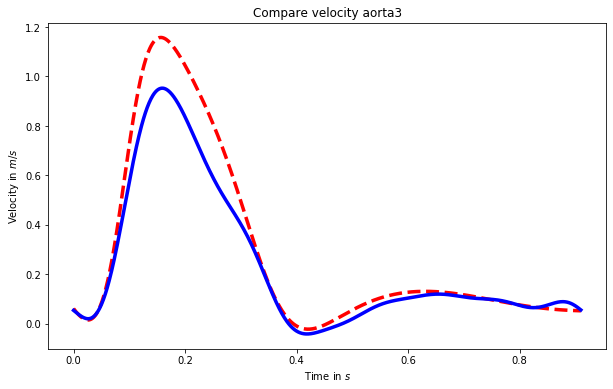

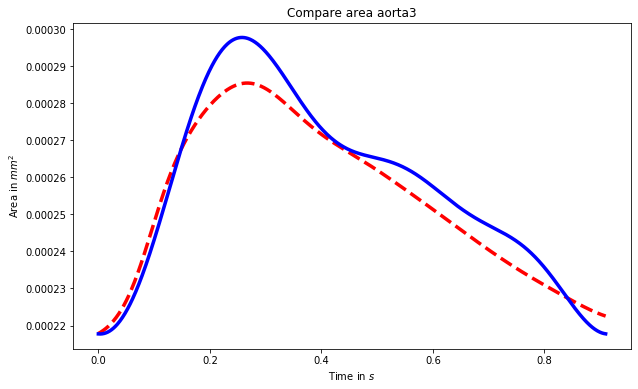

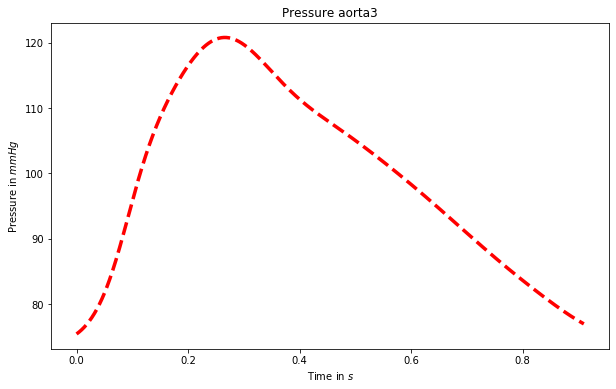

In [ ]:
# Plot the results
fig1 = plt.figure(1,figsize=(10, 6), facecolor='w')
fig2 = plt.figure(2,figsize=(10, 6), facecolor='w')
fig3 = plt.figure(3,figsize=(10, 6), facecolor='w')

ax1 = fig1.add_subplot(111)  
ax2 = fig2.add_subplot(111)  
ax3 = fig3.add_subplot(111)  

ax1.plot(t, u_predict_aorta4,'r--',linewidth=3.5, markersize=2.5)
ax1.plot(t, velocity_testpoint_aorta3,'b-',linewidth=3.5, markersize=2.5)

ax1.set_xlabel('Time in $s$')
ax1.set_ylabel('Velocity in $m/s$')
ax1.set_title('Compare velocity aorta3')

ax2.plot(t, A_predict_aorta4,'r--',linewidth=3.5, markersize=2.5)
ax2.plot(t, area_testpoint_aorta3,'b-',linewidth=3.5, markersize=2.5)

ax2.set_xlabel('Time in $s$')
ax2.set_ylabel('Area in $mm^2$')
ax2.set_title('Compare area aorta3')

ax3.plot(t, p_predict_aorta4/133.,'r--',linewidth=3.5, markersize=2.5)

ax3.set_xlabel('Time in $s$')
ax3.set_ylabel('Pressure in $mmHg$')
ax3.set_title('Pressure aorta3')